In [2]:
#
# Valuation of American Options
# with Least-Squares Monte Carlo
# Primal Algorithm
# American Put Option
#
import math
import numpy as np
np.random.seed(150000)

# Model Parameters
S0 = 36. # initial stock level
K = 40. # strike price
T = 1.0 # time-to-maturity
r = 0.06 # short rate
sigma = 0.2 # volatility

# Simulation Parameters
I = 25000
M = 50
dt = T / M
df = math.exp(-r * dt)

# Stock Price Paths
S = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt
                          + sigma * math.sqrt(dt) * np.random.standard_normal((M + 1, I)), axis = 0))
S[0] = S0

# Inner Values
h = np.maximum(K - S, 0)

# Present Value Vector (Initialization)
V = h[-1]

# American Option Valuation by Backwards Induction
for t in range(M - 1, 0, -1):
    rg = np.polyfit(S[t], V * df, 2)
    C = np.polyval(rg, S[t]) # continuation values
    V = np.where(h[t] > C, h[t], V * df) # exercise decision
    
V0 = df * np.sum(V) / I # LSM estimator
    
print("American put option value %5.3f" %V0)

American put option value 4.437


In [5]:
import math 
import numpy as np

np.random.seed(150000)

# =========================
# Model Parameters
# =========================
S0 = 36.
K = 40.
T = 1.0
r = 0.06
sigma = 0.2

# =========================
# Simulation Parameters
# =========================
I = 25000
M = 50
dt = T / M
df = math.exp(-r * dt)

# =========================
# Regression degree (DYNAMIC)
# =========================
deg = 3   # try: 2, 3, 5 ...

# =========================
# Stock Price Paths
# =========================
S = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt
                          + sigma * math.sqrt(dt) *
                          np.random.standard_normal((M + 1, I)), axis=0))
S[0] = S0

# =========================
# Inner Values (Put)
# =========================
h = np.maximum(K - S, 0)

# =========================
# Initialization
# =========================
V = h[-1]

# store coefs
regression_coefs = {}

# =========================
# Backward Induction (LSM)
# =========================
for t in range(M - 1, 0, -1):

    X = S[t]
    Y = V * df

    # ---- dynamic polynomial regression ----
    rg = np.polyfit(X, Y, deg)
    C = np.polyval(rg, X)

    # exercise decision
    V = np.where(h[t] > C, h[t], Y)

    # store
    regression_coefs[t] = rg


V0 = df * np.sum(V) / I

print(f"\nAmerican put option value {V0:5.3f}")
print(f"Polynomial regression degree = {deg}")

# =========================
# Display coefficients
# =========================
print("\nRegression coefficients by time step:")
header = "t\t" + "\t".join([f"a{deg-i}" for i in range(deg+1)])
print(header)
print("-" * 80)

for t in sorted(regression_coefs.keys(), reverse=True):
    rg = regression_coefs[t]
    line = f"{t:2d}\t" + "\t".join([f"{c: .6f}" for c in rg])
    print(line)



American put option value 4.444
Polynomial regression degree = 3

Regression coefficients by time step:
t	a3	a2	a1	a0
--------------------------------------------------------------------------------
49	-0.000338	 0.067609	-4.257840	 85.303095
48	-0.000318	 0.064795	-4.132567	 83.533633
47	-0.000305	 0.063054	-4.056790	 82.500927
46	-0.000302	 0.062666	-4.040719	 82.301834
45	-0.000287	 0.060766	-3.960303	 81.208668
44	-0.000273	 0.059012	-3.887365	 80.250577
43	-0.000258	 0.057041	-3.806008	 79.193490
42	-0.000251	 0.056291	-3.777411	 78.836203
41	-0.000253	 0.056441	-3.784964	 78.985013
40	-0.000241	 0.054943	-3.721351	 78.115968
39	-0.000235	 0.054090	-3.680906	 77.520072
38	-0.000211	 0.051199	-3.567016	 76.085644
37	-0.000195	 0.049340	-3.501334	 75.358690
36	-0.000181	 0.047837	-3.445366	 74.670995
35	-0.000152	 0.044351	-3.311573	 73.039366
34	-0.000129	 0.041857	-3.224007	 72.078725
33	-0.000121	 0.040939	-3.188363	 71.621534
32	-0.000124	 0.041491	-3.218714	 72.115132
31	-0.00


American put option value 4.444
Polynomial regression degree = 3

Regression coefficients by time step:
t	a3	a2	a1	a0
--------------------------------------------------------------------------------
49	-0.000338	 0.067609	-4.257840	 85.303095
48	-0.000318	 0.064795	-4.132567	 83.533633
47	-0.000305	 0.063054	-4.056790	 82.500927
46	-0.000302	 0.062666	-4.040719	 82.301834
45	-0.000287	 0.060766	-3.960303	 81.208668
44	-0.000273	 0.059012	-3.887365	 80.250577
43	-0.000258	 0.057041	-3.806008	 79.193490
42	-0.000251	 0.056291	-3.777411	 78.836203
41	-0.000253	 0.056441	-3.784964	 78.985013
40	-0.000241	 0.054943	-3.721351	 78.115968
39	-0.000235	 0.054090	-3.680906	 77.520072
38	-0.000211	 0.051199	-3.567016	 76.085644
37	-0.000195	 0.049340	-3.501334	 75.358690
36	-0.000181	 0.047837	-3.445366	 74.670995
35	-0.000152	 0.044351	-3.311573	 73.039366
34	-0.000129	 0.041857	-3.224007	 72.078725
33	-0.000121	 0.040939	-3.188363	 71.621534
32	-0.000124	 0.041491	-3.218714	 72.115132
31	-0.00

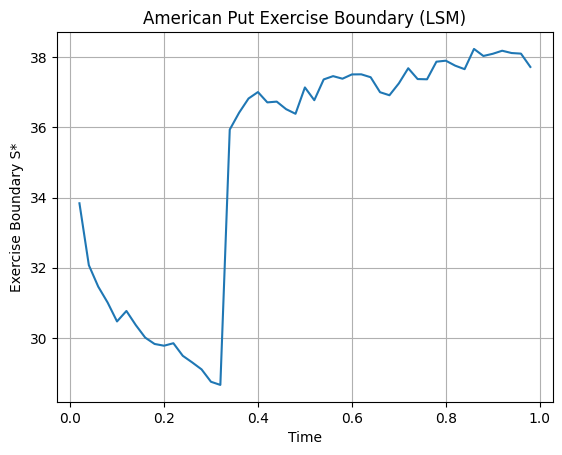

In [6]:
import math 
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(150000)

# =========================
# Model Parameters
# =========================
S0 = 36.
K = 40.
T = 1.0
r = 0.06
sigma = 0.2

# =========================
# Simulation Parameters
# =========================
I = 25000
M = 50
dt = T / M
df = math.exp(-r * dt)

# =========================
# Regression Degree
# =========================
deg = 3

# =========================
# Stock Price Paths (GBM)
# =========================
S = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt
                          + sigma * math.sqrt(dt) *
                          np.random.standard_normal((M + 1, I)), axis=0))
S[0] = S0

# =========================
# Inner Values (Put)
# =========================
h = np.maximum(K - S, 0)

# =========================
# Initialization
# =========================
V = h[-1]

regression_coefs = {}
exercise_indicator = {}
exercise_boundary = {}

# =========================
# Backward Induction (LSM)
# =========================
for t in range(M - 1, 0, -1):

    X = S[t]
    Y = V * df

    # regression
    rg = np.polyfit(X, Y, deg)
    C = np.polyval(rg, X)

    # exercise decision
    exercise = h[t] > C
    V = np.where(exercise, h[t], Y)

    # store
    regression_coefs[t] = rg
    exercise_indicator[t] = exercise

    # ---- compute boundary from paths ----
    if np.any(exercise) and np.any(~exercise):
        S_ex = X[exercise].max()
        S_no = X[~exercise].min()
        S_star = 0.5 * (S_ex + S_no)
    else:
        S_star = np.nan

    exercise_boundary[t] = S_star


# =========================
# Price
# =========================
V0 = df * np.sum(V) / I

print(f"\nAmerican put option value {V0:5.3f}")
print(f"Polynomial regression degree = {deg}")

# =========================
# Display regression coefficients
# =========================
print("\nRegression coefficients by time step:")
header = "t\t" + "\t".join([f"a{deg-i}" for i in range(deg+1)])
print(header)
print("-" * 80)

for t in sorted(regression_coefs.keys(), reverse=True):
    rg = regression_coefs[t]
    line = f"{t:2d}\t" + "\t".join([f"{c: .6f}" for c in rg])
    print(line)

# =========================
# Display Exercise Boundary
# =========================
print("\nExercise Boundary S* by time step:")
print("t\tTime\tS*")
print("-" * 40)

times = []
levels = []

for t in sorted(exercise_boundary.keys()):
    tau = t * dt
    S_star = exercise_boundary[t]
    times.append(tau)
    levels.append(S_star)
    print(f"{t:2d}\t{tau: .3f}\t{S_star: .6f}")

times = np.array(times)
levels = np.array(levels)

# =========================
# Boundary Diagnostics
# =========================
print("\nBoundary diagnostics:")
print("Min S* :", np.nanmin(levels))
print("Max S* :", np.nanmax(levels))
print("Std S* :", np.nanstd(levels))

mono = np.all(np.diff(levels[np.isfinite(levels)]) >= -1e-6)
print("Monotonic (in time):", mono)

# =========================
# Plot
# =========================
plt.figure()
plt.plot(times, levels)
plt.xlabel("Time")
plt.ylabel("Exercise Boundary S*")
plt.title("American Put Exercise Boundary (LSM)")
plt.grid(True)
plt.show()
